In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('./data/sample_data.csv')
data.head()

,y,x1,x2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [4]:
X = data[['x1','x2']]

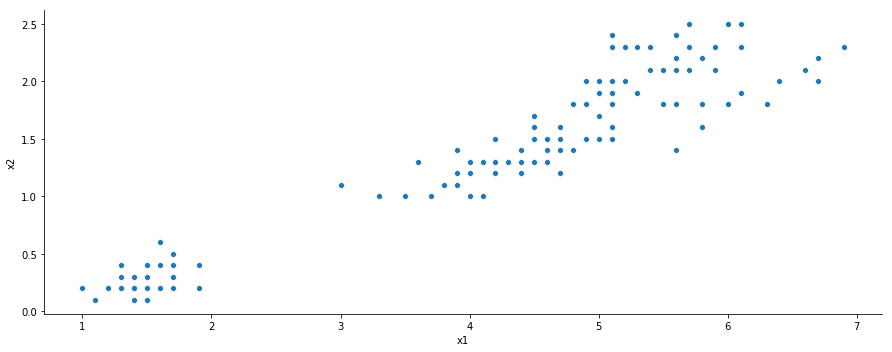

In [5]:
sns.relplot('x1','x2',data=X,aspect=2.5)
plt.show()

**Covariance Matrix**

In [6]:
X.cov()

,x1,x2
x1,3.113179,1.296387
x2,1.296387,0.582414


**Eigen Values & Eigen Vectors**

In [11]:
eigvalue, eigvector = np.linalg.eig(X.cov())
print('INFO: Eigenvectos = \n',eigvector)
print('\nINFO: Eigenvalues =',eigvalue)

INFO: Eigenvectos = 
 [[ 0.92154695 -0.38826694]
 [ 0.38826694  0.92154695]]

INFO: Eigenvalues = [3.65937449 0.03621925]


**Transformed vectors**

> $ [X transform] = [X].[Eigenvectos]$

In [14]:
x_arr = X.values # converting into array

In [17]:
# None, 2  = (None, 2 ) * (2,2)
X_pca = np.dot(x_arr,eigvector) # performing dot product

In [20]:
X_pca_df = pd.DataFrame(X_pca,columns=['x1','x2'])
X_pca_df.head()

,x1,x2
0,1.367819,-0.359264
1,1.367819,-0.359264
2,1.275664,-0.320438
3,1.459974,-0.398091
4,1.367819,-0.359264


In [21]:
X_pca_df.var()

x1    3.659374
x2    0.036219
dtype: float64

**Visualizing data**

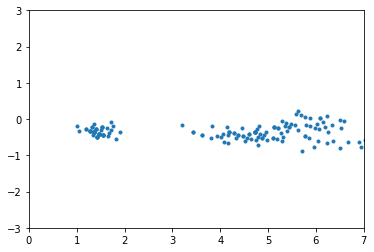

In [37]:
plt.plot(X_pca[:,0],X_pca[:,1],'.')
plt.xlim((0,7)),plt.ylim((-3,3))
plt.show()

**Setting $X_2$ to zero**

In [40]:
X_pca_df['X2_0'] = 0
X_pca_df.head()

,x1,x2,X2_0
0,1.367819,-0.359264,0
1,1.367819,-0.359264,0
2,1.275664,-0.320438,0
3,1.459974,-0.398091,0
4,1.367819,-0.359264,0


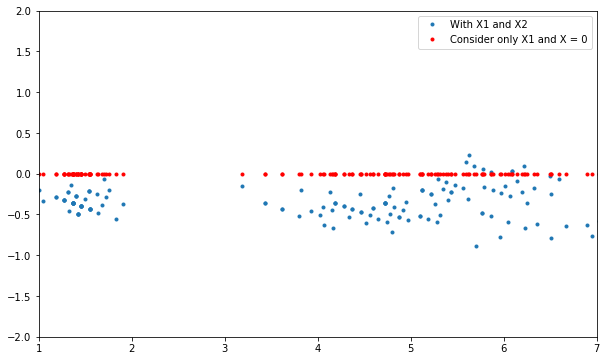

In [46]:
plt.figure(figsize=(10,6))
plt.plot(X_pca_df.iloc[:,0],X_pca_df.iloc[:,1],'.')
plt.plot(X_pca_df.iloc[:,0],X_pca_df.iloc[:,2],'r.')
plt.xlim((1,7)),plt.ylim((-2,2))
plt.legend(['With X1 and X2','Consider only X1 and X = 0'])
plt.show()